<a href="https://colab.research.google.com/github/Chigaga/space_weather/blob/main/Flare_ribbons_area_VS_GOES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 8

#### Flares – temporal evolution and magnetic field structure. Part II

In [ ]:
import numpy as np
import pandas as pd
import glob
%matplotlib inline
#%matplotlib notebook
#%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import datetime
import xarray 
from astropy.timeseries import LombScargle
import math
#import seaborn as sns
from astropy.io import fits
from scipy import ndimage, misc
import math
from astropy.time import Time
from astropy.nddata import Cutout2D
from astropy import units as u
import sys
from matplotlib.colors import LogNorm
import matplotlib.image as mpimg 
import matplotlib.animation as animation
from scipy import ndimage, misc, signal, stats
from datetime import datetime, timedelta
from time import strftime
from time import gmtime
from scipy import interpolate

#### Step 1

In [ ]:
goes = pd.read_csv('goes.txt', sep="  ", header=None)
goes.columns = ["Time,sec", "X-ray flux"]


<ipython-input-307-24824e13e262>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  goes = pd.read_csv('goes.txt', sep="  ", header=None)


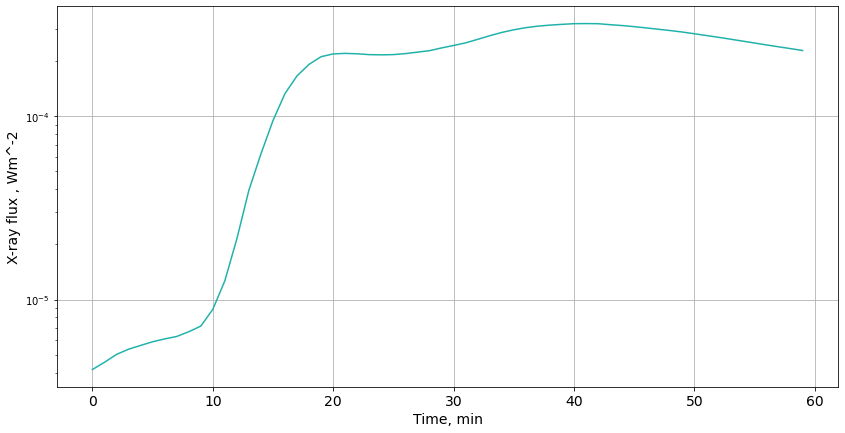

In [ ]:
plt.plot(goes['Time,sec']/60, (goes["X-ray flux"]), color = 'lightseagreen')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)
plt.yscale('log')
plt.grid()
plt.ylabel('X-ray flux , Wm^-2', size = 14)
plt.xlabel('Time, min', size = 14)
#plt.xticks(np.arange(8000, 65000, 5000))
plt.xticks(fontsize = 14)
plt.savefig('xray_flux',dpi=300)
plt.show()

In [ ]:
print('The maximum values of the soft X-ray flux is '
      + str(max(goes["X-ray flux"])) + ' Wm^-2')

The maximum values of the soft X-ray flux is 0.00031919 Wm^-2


According to the flares classification, the discussed flare isrelated to the X4 type.

### Step 2

In [ ]:
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%H:%M:%S') for dt in 
       datetime_range(datetime(2014, 10, 24, 21), datetime(2014, 10, 24, 22), 
       timedelta(seconds=72))]

dts = dts[:-1]

In [ ]:
diff = goes.diff()

In [ ]:
diff = diff['X-ray flux']

In [ ]:
times = []
a = 0
for i in range(49):
    a += 72 
    times.append(a)

In [ ]:
times = np.asarray(times)

In [ ]:
area = pd.read_csv('area.csv')

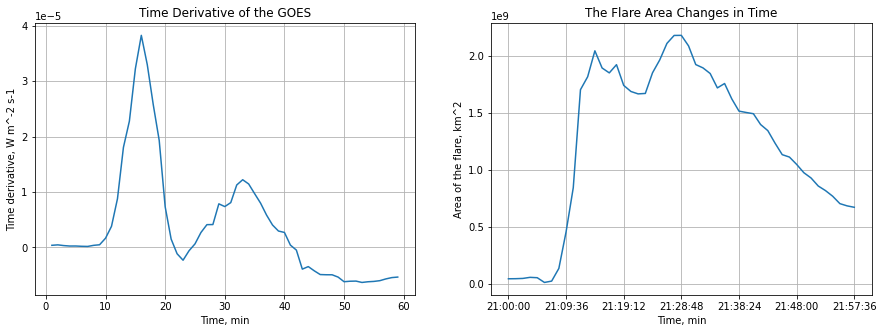

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))


        
# Line plots
ax1.set_title('Time Derivative of the GOES')
ax1.plot(goes['Time,sec']/60, diff)
ax1.set_ylabel('Time derivative, W m^-2 s-1')
ax1.set_xlabel('Time, min')
ax1.grid()

ax2.set_title('The Flare Area Changes in Time')
ax2.plot(dts, area['Area, km'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
ax2.set_ylabel('Area of the flare, km^2')
ax2.set_xlabel('Time, min')
ax2.grid()
#plt.savefig('flare_filt',dpi=300)


plt.show()


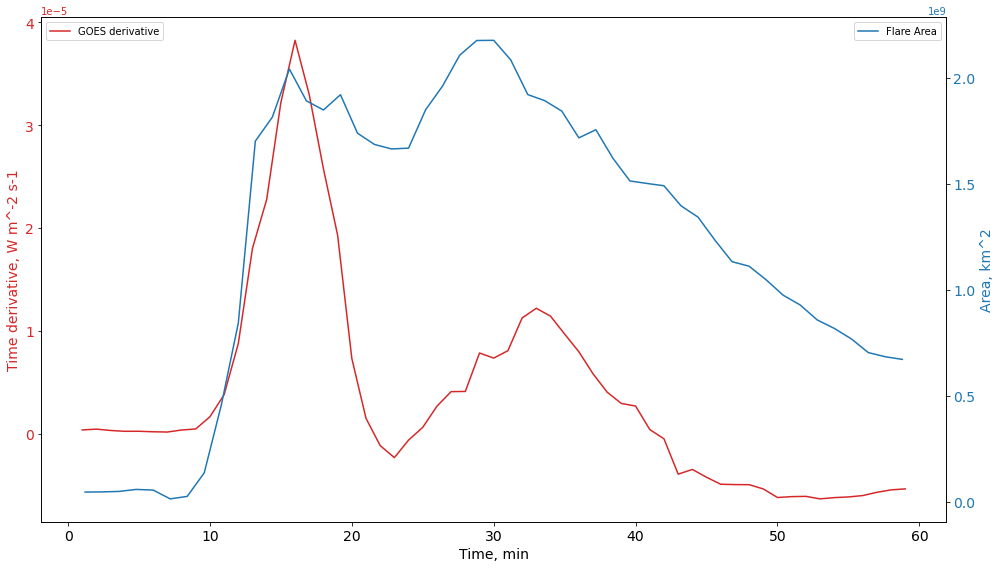

In [ ]:
fig, ax1 = plt.subplots()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)

color = 'tab:red'
ax1.set_xlabel('Time, min', fontsize = 14)
ax1.set_ylabel('Time derivative, W m^-2 s-1', color=color, fontsize = 14)
ax1.plot(goes['Time,sec']/60, diff, color=color, label = 'GOES derivative')
ax1.tick_params(axis='y', labelcolor=color, labelsize = 14)
ax1.tick_params(labelsize = 14)
ax1.legend(loc = 'upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Area, km^2', color=color, fontsize = 14)  # we already handled the x-label with ax1
ax2.plot(times/60, area['Area, km'], color=color, label = 'Flare Area')
ax2.tick_params(axis='y', labelcolor=color, labelsize = 14)
ax2.tick_params(labelsize = 14)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.legend(loc = 'upper right')
plt.savefig('derivative', dpi=300)
plt.show()

### Step 3

In [ ]:
y = area['Area, km']
x = times
f = interpolate.interp1d(x, y, fill_value="extrapolate")
y_new = f(goes['Time,sec'])

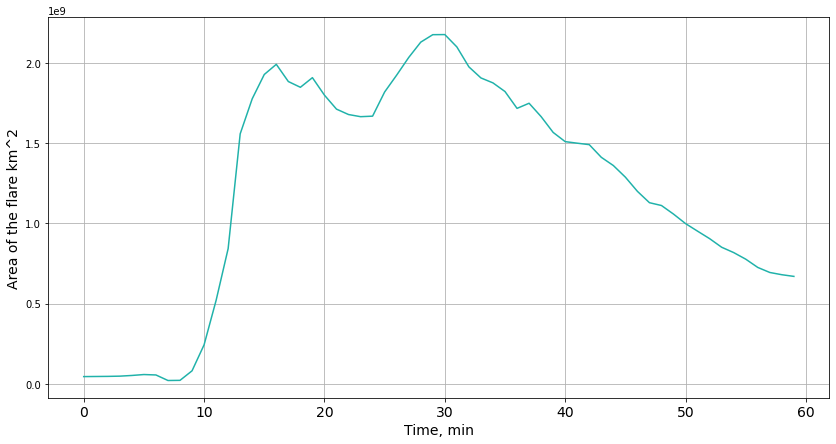

In [ ]:
plt.plot(goes['Time,sec']/60, y_new, color = 'lightseagreen')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)
plt.grid()
plt.ylabel('Area of the flare km^2', size = 14)
plt.xlabel('Time, min', size = 14)
#plt.xticks(np.arange(8000, 65000, 5000))
plt.xticks(fontsize = 14)
#plt.savefig('flare_area',dpi=300)
plt.show()

In [ ]:
y_new = y_new[1:]
diff = diff[1:]

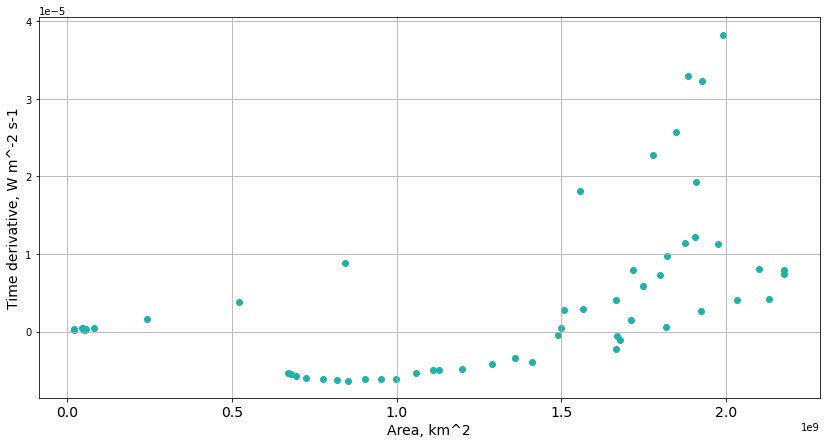

In [ ]:
plt.scatter(y_new, diff, color = 'lightseagreen')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)
plt.grid()
plt.ylabel('Time derivative, W m^-2 s-1', size = 14)
plt.xlabel('Area, km^2', size = 14)
#plt.xticks(np.arange(8000, 65000, 5000))
plt.xticks(fontsize = 14)

#plt.savefig('flare_area',dpi=300)
plt.show()

In [ ]:
model = np.polyfit(diff, y_new, 1)

In [ ]:
def line_data(a,b,x):
    return a*x + b 

In [ ]:
line_y = line_data(model[0], model[1], diff)

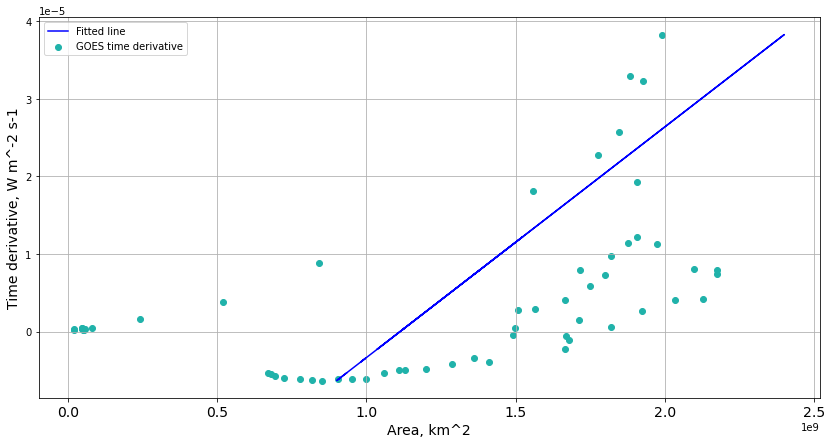

In [ ]:
plt.scatter(y_new, diff, color = 'lightseagreen', label = 'GOES time derivative')
plt.plot(line_y, diff, color = 'blue', label = 'Fitted line')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 7)
plt.grid()
plt.ylabel('Time derivative, W m^-2 s-1', size = 14)
plt.xlabel('Area, km^2', size = 14)
#plt.xticks(np.arange(8000, 65000, 5000))
plt.xticks(fontsize = 14)
plt.legend()
plt.savefig('correlation',dpi=300)
plt.show()

In [ ]:
pearson = stats.pearsonr(y_new, line_y)

In [ ]:
pearson

(0.50052558730587, 5.412774869817793e-05)

#### Step 4

In [ ]:
def getdata(filename):
    hdulist = fits.open(filename)
    hdu = hdulist[0]
    image_data = hdu.data
    image_data_ud = np.flipud(image_data)
    return image_data_ud

def cutting(data):
    position = (1250, 1250)
    size = (400, 400)
    cutout = Cutout2D(data, position, size)
    return cutout

def flare_extraction(pic12):
    flare = np.zeros((400,400))
    for i in range(len(pic12)):
        for j in range(len(pic12)):
            if pic12[i][j] > 3400:
                flare[i][j] = 1
            else:
                flare[i][j] = 0
    return flare

In [ ]:
files = glob.glob("/content/drive/MyDrive/Skoltech/Space_Weather_assignments/Assignment7/data/*.fits")

In [ ]:
total_flare = np.zeros((400,400))
for i in range(len(files)):    
    pic = cutting(getdata(files[i])).data
    flare = flare_extraction(pic)
    filt = signal.medfilt(flare, kernel_size = 5)
    #filt = ndimage.median_filter(flare, size=30)
    total_flare = total_flare + filt

In [ ]:
total_flare[total_flare > 0] = 1

In [ ]:
uniques = np.unique(total_flare, return_counts=True)

In [ ]:
uniques

(array([0., 1.]), array([154268,   5732]))

In [ ]:
hdulist = fits.open(files[0])
hdu = hdulist[0]

cdelt1 = hdu.header['CDELT1']
cdelt2 = hdu.header['CDELT2']
rsun_obs = hdu.header['RSUN_OBS']

# obtain km per pixel
rsun_km = 696340
km_per_sec = rsun_km / rsun_obs
km2_pix = (km_per_sec * cdelt1)**2

In [ ]:
flare_total_area = uniques[1][1] * km2_pix
print(flare_total_area)

4484421584.762256


#### Step 5

<ipython-input-355-e96bf9c1fe14>:7: UserWarning: No contour levels were found within the data range.
  plt.contour(total_flare, colors = 'cyan', alpha=1, levels=levels, linewidths = 2)


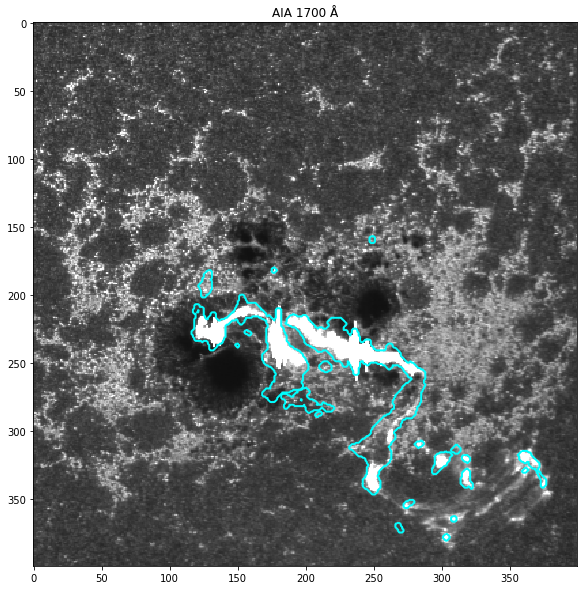

In [ ]:
plt.figure()

plt.imshow(cutting(getdata(files[12])).data, cmap='gray', 
           vmin=0, vmax=3700, interpolation='none')
#plt.imshow(total_flare,  cmap='Reds', alpha = 1, interpolation='none')
levels = (0,1)  # Define contour levels to use
plt.contour(total_flare, colors = 'cyan', alpha=1, levels=levels, linewidths = 2)
plt.title('AIA 1700 Å')
#plt.colorbar()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
#name = '%i.png' % (i)
#plt.savefig('initial',dpi=300)

In [ ]:
conti = '/content/drive/MyDrive/Skoltech/Space_Weather_assignments/Assignment8/step5/HMI_continuum.fits'
magn = '/content/drive/MyDrive/Skoltech/Space_Weather_assignments/Assignment8/step5/HMI_magnetogram.fits'

In [ ]:
cont_data = cutting(getdata(conti)).data
magn_data = cutting(getdata(magn)).data

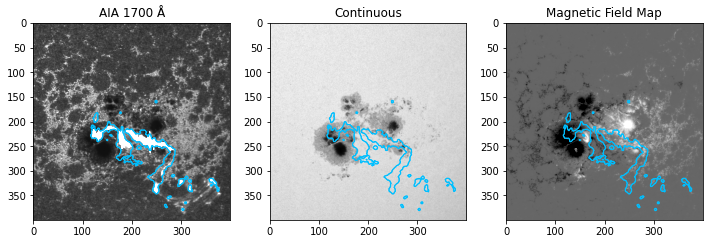

In [ ]:
pic = cutting(getdata(files[i])).data
flare = flare_extraction(pic)
filt = signal.medfilt(flare, kernel_size = 5)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,5))

# Line plots
ax1.set_title('AIA 1700 Å')
ax1.imshow(cutting(getdata(files[12])).data, cmap='gray', 
           vmin=0, vmax=3700)
levels = (1)  # Define contour levels to use
clr = 'deepskyblue'
ax1.contour(total_flare, colors=clr, alpha=1, levels=levels, linewidths = 1)

ax2.set_title('Continuous')
ax2.imshow(cont_data,  cmap='gray')
ax2.contour(total_flare, colors=clr, alpha=1, levels=levels, linewidths = 1)

ax3.set_title('Magnetic Field Map')
ax3.imshow(magn_data, cmap='gray', vmin = -1000, vmax=1500)
ax3.contour(total_flare, colors=clr, alpha=1, levels=levels, linewidths = 1)
plt.savefig('trio.png',dpi=300)
plt.show()


<ipython-input-360-a431a29500b4>:9: UserWarning: No contour levels were found within the data range.
  plt.contour(total_flare, colors=clr, alpha=1, levels=levels, linewidths = 1)


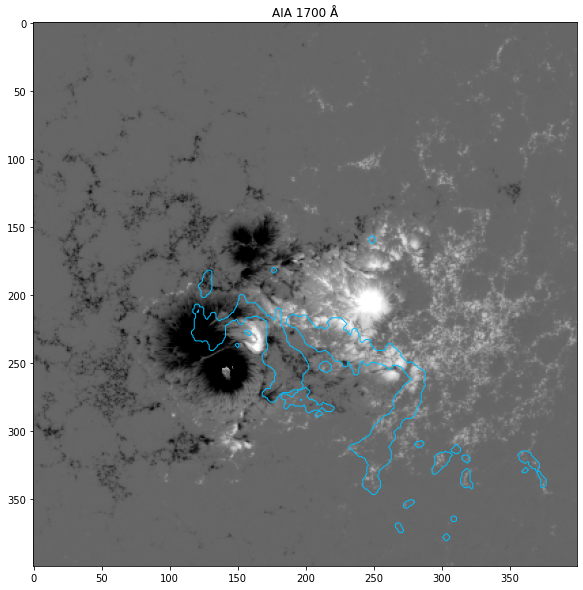

In [ ]:
plt.figure()

levels = (0,1)  # Define contour levels to use
plt.title('AIA 1700 Å')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
#plt.vlines(185, 0, 350, color = 'red', linewidths = 1)
plt.imshow(magn_data, cmap='gray', vmin = -1000, vmax=1500)
plt.contour(total_flare, colors=clr, alpha=1, levels=levels, linewidths = 1)

plt.show()

#### Step 6

In [ ]:
def negative_pole(magn, flare):
    neg = np.zeros((400,400))
    neg_flux = np.zeros((400,400))
    for i in range(len(magn)):
        for j in range(len(magn)):
            if magn[i][j] <0 and flare[i][j] != 0:
                neg[i][j] = 1
                neg_flux[i][j] = magn[i][j]
            else:
                neg[i][j] = 0
                neg_flux[i][j] = 0
    return neg, neg_flux

In [ ]:
def positive_pole(magn, flare):
    pos = np.zeros((400,400))
    pos_flux = np.zeros((400,400))
    for i in range(len(magn)):
        for j in range(len(magn)):
            if magn[i][j] >0 and flare[i][j] != 0:
                pos[i][j] = 1
                pos_flux[i][j] = magn[i][j]
            else:
                pos[i][j] = 0
                pos_flux[i][j] = 0
    return pos, pos_flux

In [ ]:
neg_pole, neg_flux = negative_pole(magn_data, total_flare)
pos_pole, pos_flux = positive_pole(magn_data, total_flare)

In [ ]:
neg_flux_total = np.sum(neg_flux)*km2_pix*10**10
pos_flux_total = np.sum(pos_flux)*km2_pix*10**10

In [ ]:
print('Total negative magnetic flux is ' + 
      str(round(neg_flux_total,2)))

print('Total positive magnetic flux is ' + 
      str(round(pos_flux_total,2)))


Total negative magnetic flux is -7.07085762948871e+21
Total positive magnetic flux is 8.337591694966799e+21


In [ ]:
ratio = (abs(pos_flux_total)/abs(neg_flux_total) 
         - 1)*100
print('The positive magnetic flux is ' +
      str(round(ratio,1)) + 
          '% larger than negative one')

The positive magnetic flux is 17.9% larger than negative one
